<a href="https://www.kaggle.com/code/abdelazizsami/project-monitoring-a-financial-fraud-detection-mod?scriptVersionId=198693104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

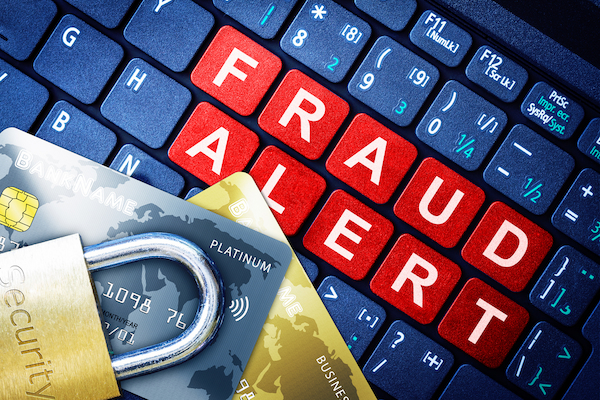

🏦 Banks are battling frauds with machine learning models, but changing data patterns can weaken these defenses. London's Poundbank needs your help to figure out why their fraud detection models aren't as accurate anymore.

Poundbank recommends the `nannyml` library for monitoring machine learning models, which is also their tool of choice.

## The data

They have provided you with a reference(test data) and analysis set(production data). A summary and preview are provided below.

## reference.csv and analysis.csv

| Column     | Description              |
|------------|--------------------------|
| `'timestamp'` | Date of the transaction. |
| `'time_since_login_min'` | Time since the user logged in to the app. |
| `'transaction_amount'` | The amount of Pounds(£) that users sent to another account. |
| `'transaction_type'` | Transaction type: <ul><li>`CASH-OUT` - Withdrawing money from an account.</li><li>`PAYMENT` - Transaction where a payment is made to a third party.</li><li>`CASH-IN` - This is the opposite of a cash-out. It involves depositing money into an account.</li><li>`TRANSFER` - Transaction which involves moving funds from one account to another.</li> |
| `'is_first_transaction'` | A binary indicator denoting if the transaction is the user's first (1 for the first transaction, 0 otherwise). |
| `'user_tenure_months'` | The duration in months since the user's account was created or since they became a member. |
| `'is_fraud'` | A binary label indicating whether the transaction is fraudulent (1 for fraud, 0 otherwise). |
| `'predicted_fraud_proba'` | The probability assigned by a detection model indicates the likelihood of a fraudulent transaction. |
| `'predicted_fraud'` |  The predicted classification label is calculated based on predicted fraud probability by the detection model (1 for predicted fraud, 0 otherwise). |

In [1]:
# Re-run this cell to install nannyml
!pip install nannyml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 1.0.1
    Uninstalling python-dotenv-1.0.1

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import nannyml as nml
nml.disable_usage_logging()

reference = pd.read_csv("/kaggle/input/monitoring-a-financial-fraud-detection-model/analysis.csv")
analysis = pd.read_csv("/kaggle/input/monitoring-a-financial-fraud-detection-model/reference.csv")
reference.head()

2024-09-28 19:46:57,959	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-28 19:46:58,672	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


,timestamp,time_since_login_min,transaction_amount,transaction_type,is_first_transaction,user_tenure_months,predicted_fraud_proba,predicted_fraud,is_fraud
0,2018-11-01 00:04:52.464,2.174243,2832.3,CASH-OUT,False,1.013445,0.97,1,1
1,2018-11-01 00:13:35.616,2.493543,1426.9,CASH-OUT,False,6.700041,0.09,0,0
2,2018-11-01 00:22:18.768,1.807432,1302.0,PAYMENT,False,6.291723,0.01,0,0
3,2018-11-01 00:31:01.920,2.133415,1432.1,PAYMENT,True,8.165503,0.00,0,0
4,2018-11-01 00:39:45.072,1.987827,1870.3,CASH-OUT,False,8.205203,0.03,0,0


In [3]:
# Import required libraries
import pandas as pd
import nannyml as nml
nml.disable_usage_logging()

reference = pd.read_csv("/kaggle/input/monitoring-a-financial-fraud-detection-model/reference.csv")
analysis = pd.read_csv("/kaggle/input/monitoring-a-financial-fraud-detection-model/analysis.csv")

## Identifing the months when both the estimated and realized ROC AUC of the model have alerts. Store the names of these months as lowercase strings in a list named months_with_performance_alerts. 

# Get the estimated performance using CBPE algorithm
cbpe = nml.CBPE(
    timestamp_column_name="timestamp",
    y_true="is_fraud",
    y_pred="predicted_fraud",
    y_pred_proba="predicted_fraud_proba",
    problem_type="classification_binary",
    metrics=["accuracy"],
    chunk_period="m"
)

cbpe.fit(reference)
est_results = cbpe.estimate(analysis)

# Calculate the realized performance
calculator = nml.PerformanceCalculator(
    y_true="is_fraud",
    y_pred="predicted_fraud",
    y_pred_proba="predicted_fraud_proba",
    timestamp_column_name="timestamp",
    metrics=["accuracy"],
    chunk_period="m",
    problem_type="classification_binary",
)
calculator = calculator.fit(reference)
calc_results = calculator.calculate(analysis)

# Compare the results and find the months with alerts
est_results.compare(calc_results).plot().show()
months_with_performance_alerts = ["april_2019", "may_2019", "june_2019"]
print(months_with_performance_alerts)

## Determining which alerting feature has the strongest correlation with the model’s realized performance. Store the name of this feature in a variable named highest_correlation_feature. 

features = ["time_since_login_min", "transaction_amount",
            "transaction_type", "is_first_transaction", 
            "user_tenure_months"]

# Calculate the univariate drift results
udc = nml.UnivariateDriftCalculator(
    timestamp_column_name="timestamp",
    column_names=features,
    chunk_period="m",
    continuous_methods=["kolmogorov_smirnov"],
    categorical_methods=["chi2"]
)

udc.fit(reference)
udc_results = udc.calculate(analysis)

# Use the correlation ranker
ranker = nml.CorrelationRanker()
ranker.fit(
    calc_results.filter(period="reference"))

correlation_ranked_features = ranker.rank(udc_results, calc_results)

# Find the highest correlating feature
display(correlation_ranked_features)
highest_correlation_feature = "time_since_login_min"
print(highest_correlation_feature)

## Use the summary average statistics calculator to find out what were the monthly average transactions amounts, and if there's any alert. Record this value in a variable called alert_avg_transaction_amount.

# Calculate average monthly transactions
calc = nml.SummaryStatsAvgCalculator(
    column_names=["transaction_amount"],
    chunk_period="m",
    timestamp_column_name="timestamp",
)

calc.fit(reference)
stats_avg_results = calc.calculate(analysis)

# Find the month
stats_avg_results.plot().show()
alert_avg_transaction_amount = 3069.8184
print(alert_avg_transaction_amount)

## Answer to the bonus question
"""
First, I recommend looking at the distribution plots for all features and analyzing them using this command: 
- `univariate_data_drift.filter(column_names=features).plot(kind="distribution")`

Observations:

- time_since_log_min - From April to June, the transactions made within one minute after logging in completely vanished.
- transaction_amount - In May and June, a larger number of transactions appeared. Additionally, as you discovered in the third question, the average transaction value has increased and raised an alert.

Possible explanation: 

Fraudsters may have noticed that early card transactions, when done right after logging in, often led to account blocking. As a result, they began waiting a bit longer before transferring money to their account to avoid detection. Furthermore, they tend to make a single larger transfer instead of many smaller ones, leading to an increase in the average transaction value.
"""

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



['april_2019', 'may_2019', 'june_2019']


,column_name,pearsonr_correlation,pearsonr_pvalue,has_drifted,rank
0,time_since_login_min,0.952925,1.045775e-09,True,1
1,transaction_amount,0.626235,5.427712e-03,True,2
2,is_first_transaction,0.054255,8.306916e-01,True,3
3,user_tenure_months,-0.100547,6.913911e-01,True,4
4,transaction_type,-0.186569,4.585328e-01,True,5


time_since_login_min


/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



3069.8184


'\nFirst, I recommend looking at the distribution plots for all features and analyzing them using this command: \n- `univariate_data_drift.filter(column_names=features).plot(kind="distribution")`\n\nObservations:\n\n- time_since_log_min - From April to June, the transactions made within one minute after logging in completely vanished.\n- transaction_amount - In May and June, a larger number of transactions appeared. Additionally, as you discovered in the third question, the average transaction value has increased and raised an alert.\n\nPossible explanation: \n\nFraudsters may have noticed that early card transactions, when done right after logging in, often led to account blocking. As a result, they began waiting a bit longer before transferring money to their account to avoid detection. Furthermore, they tend to make a single larger transfer instead of many smaller ones, leading to an increase in the average transaction value.\n'